# MovieLens Data Exploration

Project Data Description:
MovieLens data sets were collected by the GroupLens Research Project at the University of Minnesota.
Source: https://grouplens.org/datasets/movielens/100k/

Domain:
Entertainment and Internet

Context:
The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

Attribute Information:
Download the zip file from the data source.
Extract the zip file and you will find a folder named ml-100k
Go through the README file that you will find in the folder from the above step where you will find the information about the attributes in the three datasets.

Learning Outcomes:
Exploratory Data Analysis
Visualization using Python
Pandas

Objective:
To implement the techniques learnt as a part of the project

Steps and tasks:
You will need to import 3 files (unzip the ) from the folder as data frames into your Jupyter notebook
u.data
u.item
u.user

Note that once you download the zip file unzip it in your local system, you can import the data into a data frame the same way as you would import a csv file. 
Please find below the snippet that can be used to import the above .data files-

#read u.data file from the folder and name the columns after referring to the Readme file in the same folder

ratings = pd.read_csv('C://Python Project//ml-100k//u.data',
                      sep = '\t',names= ['UserID', 'ItemID', 'rating', 'Timestamp' ])

- Note that you need to go through the readme.txt to understand the attributes of each .data file. For example, the above file, u.data has the above 4 attributes (used in importing) mentioned in the snippet. (10 marks)

- Display univariate plots of the attributes: 'rating', 'age', 'release date', 'gender' and 'occupation', from their respective data frames (10 marks)

- Visualize how the popularity of Genres has changed over the years. From the graph, one should be able to see for any given year, movies of which genre got released the most. For this you will need to research concepts regarding string manipulation. Hint: you might want to use the string.split() to get the years from the release date. Also, a good understanding of a heatmap will come in handy. (15 marks)

- Display the top 25 movies by average rating, as a list/series/data frame. Note: Consider only the movies which received at least a 100 ratings (10 marks)

- Comment on the validity of the following statements (no need for doing a statistical test. Compare percentages) - (15 marks)

    - Men watch more drama than women
    - Men watch more Romance than women
    - Women watch more Sci-Fi than men

References:
https://movielens.org/

In [1]:
# Import Python Libs
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes = True)
import matplotlib.pyplot as plt
%matplotlib inline

# TASK 1
- Note that you need to go through the readme.txt to understand the attributes of each .data file. For example, the above file, u.data has the above 4 attributes (used in importing) mentioned in the snippet. (10 marks)

In [2]:
#Read u.data, u.item, u.user
col_n = ['movie_id','movie_title','release_date','video_release_date','IMDb_URL','unknown','Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film_Noir','Horror','Musical','Mystery','Romance','Sci_Fi','Thriller','War','Western']

ratings = pd.read_csv('/Users/silver-moon/work/AIML/1.Foundations_for_AIML/PROJECT-1/ml-100k/u.data', sep = '\t', names = ['UserID', 'ItemID', 'rating', 'timestamp'])

movies = pd.read_csv('/Users/silver-moon/work/AIML/1.Foundations_for_AIML/PROJECT-1/ml-100k/u.item', sep = '|', encoding = 'latin-1', names = col_n)

users = pd.read_csv('/Users/silver-moon/work/AIML/1.Foundations_for_AIML/PROJECT-1/ml-100k/u.user', sep = '|', names = ['UserID', 'Age', 'Gender', 'Occupation', 'ZipCode'])

In [3]:
print(ratings.shape)
ratings.head()

(100000, 4)


,UserID,ItemID,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
print(movies.shape)
movies.head()

(1682, 24)


,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
print(users.shape)
users.head()

(943, 5)


,UserID,Age,Gender,Occupation,ZipCode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


# TASK 2
- Display univariate plots of the attributes: 'rating', 'age', 'release date', 'gender' and 'occupation', from their respective data frames (10 marks)

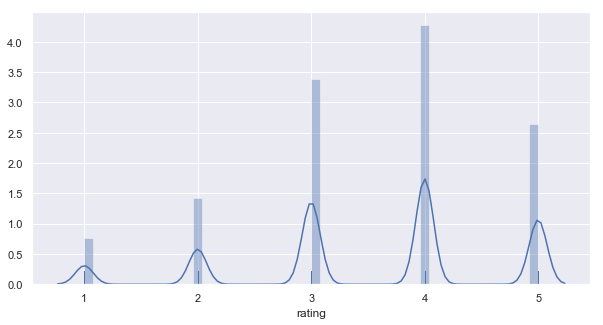

In [6]:
plt.figure(figsize=(10,5))  # setting the figure size
sns.distplot(ratings['rating'], rug = True)

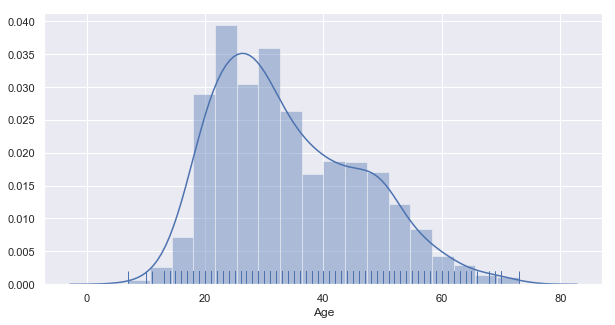

In [7]:
plt.figure(figsize=(10,5))  # setting the figure size
sns.distplot(users['Age'], rug = True)

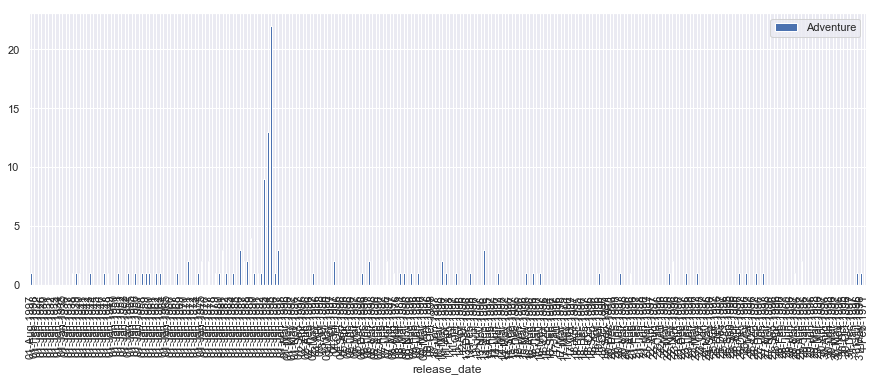

In [8]:
movies.groupby(by=['release_date'])['Adventure'].sum().reset_index().plot(x='release_date',y='Adventure',kind='bar', figsize=(15,5))

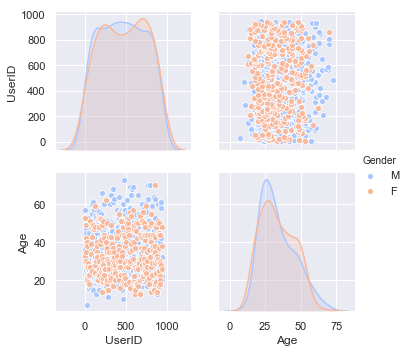

In [9]:
#sns.distplot(users['Gender'])
#plt.figure(figsize=(10,20))  # setting the figure size
sns.pairplot(users, hue ="Gender", palette ='coolwarm')

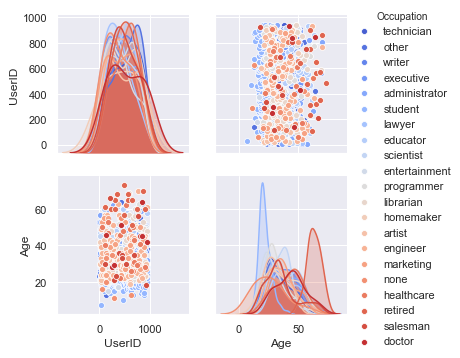

In [10]:
#sns.distplot(users['Occupation'])
#plt.figure(figsize=(10,5))  # setting the figure size
sns.pairplot(users, hue ="Occupation", palette ='coolwarm')

# Answer TASK 2 : Univariate graphs cannot be generated for categorical variables: Gender, Release date and Occupation

# TASK 3

- Visualize how the popularity of Genres has changed over the years. From the graph, one should be able to see for any given year, movies of which genre got released the most. For this you will need to research concepts regarding string manipulation. Hint: you might want to use the string.split() to get the years from the release date. Also, a good understanding of a heatmap will come in handy. (15 marks)

In [11]:
release_date_split = movies['release_date'].str.split('-', n=2, expand = True)
movies.insert(2, "Release Day", release_date_split[0], False)
movies.insert(3, "Release Month", release_date_split[1], False)
movies.insert(4, "Release Year", release_date_split[2], False)

In [12]:
movies.head()

,movie_id,movie_title,Release Day,Release Month,Release Year,release_date,video_release_date,IMDb_URL,unknown,Action,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,1,Toy Story (1995),01,Jan,1995,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01,Jan,1995,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01,Jan,1995,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01,Jan,1995,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01,Jan,1995,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
pivot_table_1 = movies.pivot_table(values= ['unknown','Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film_Noir','Horror','Musical','Mystery','Romance','Sci_Fi','Thriller','War','Western'], index ='Release Year',aggfunc=np.sum)

In [14]:
pivot_table_1.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western,unknown
Release Year,,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


# HEATMAP

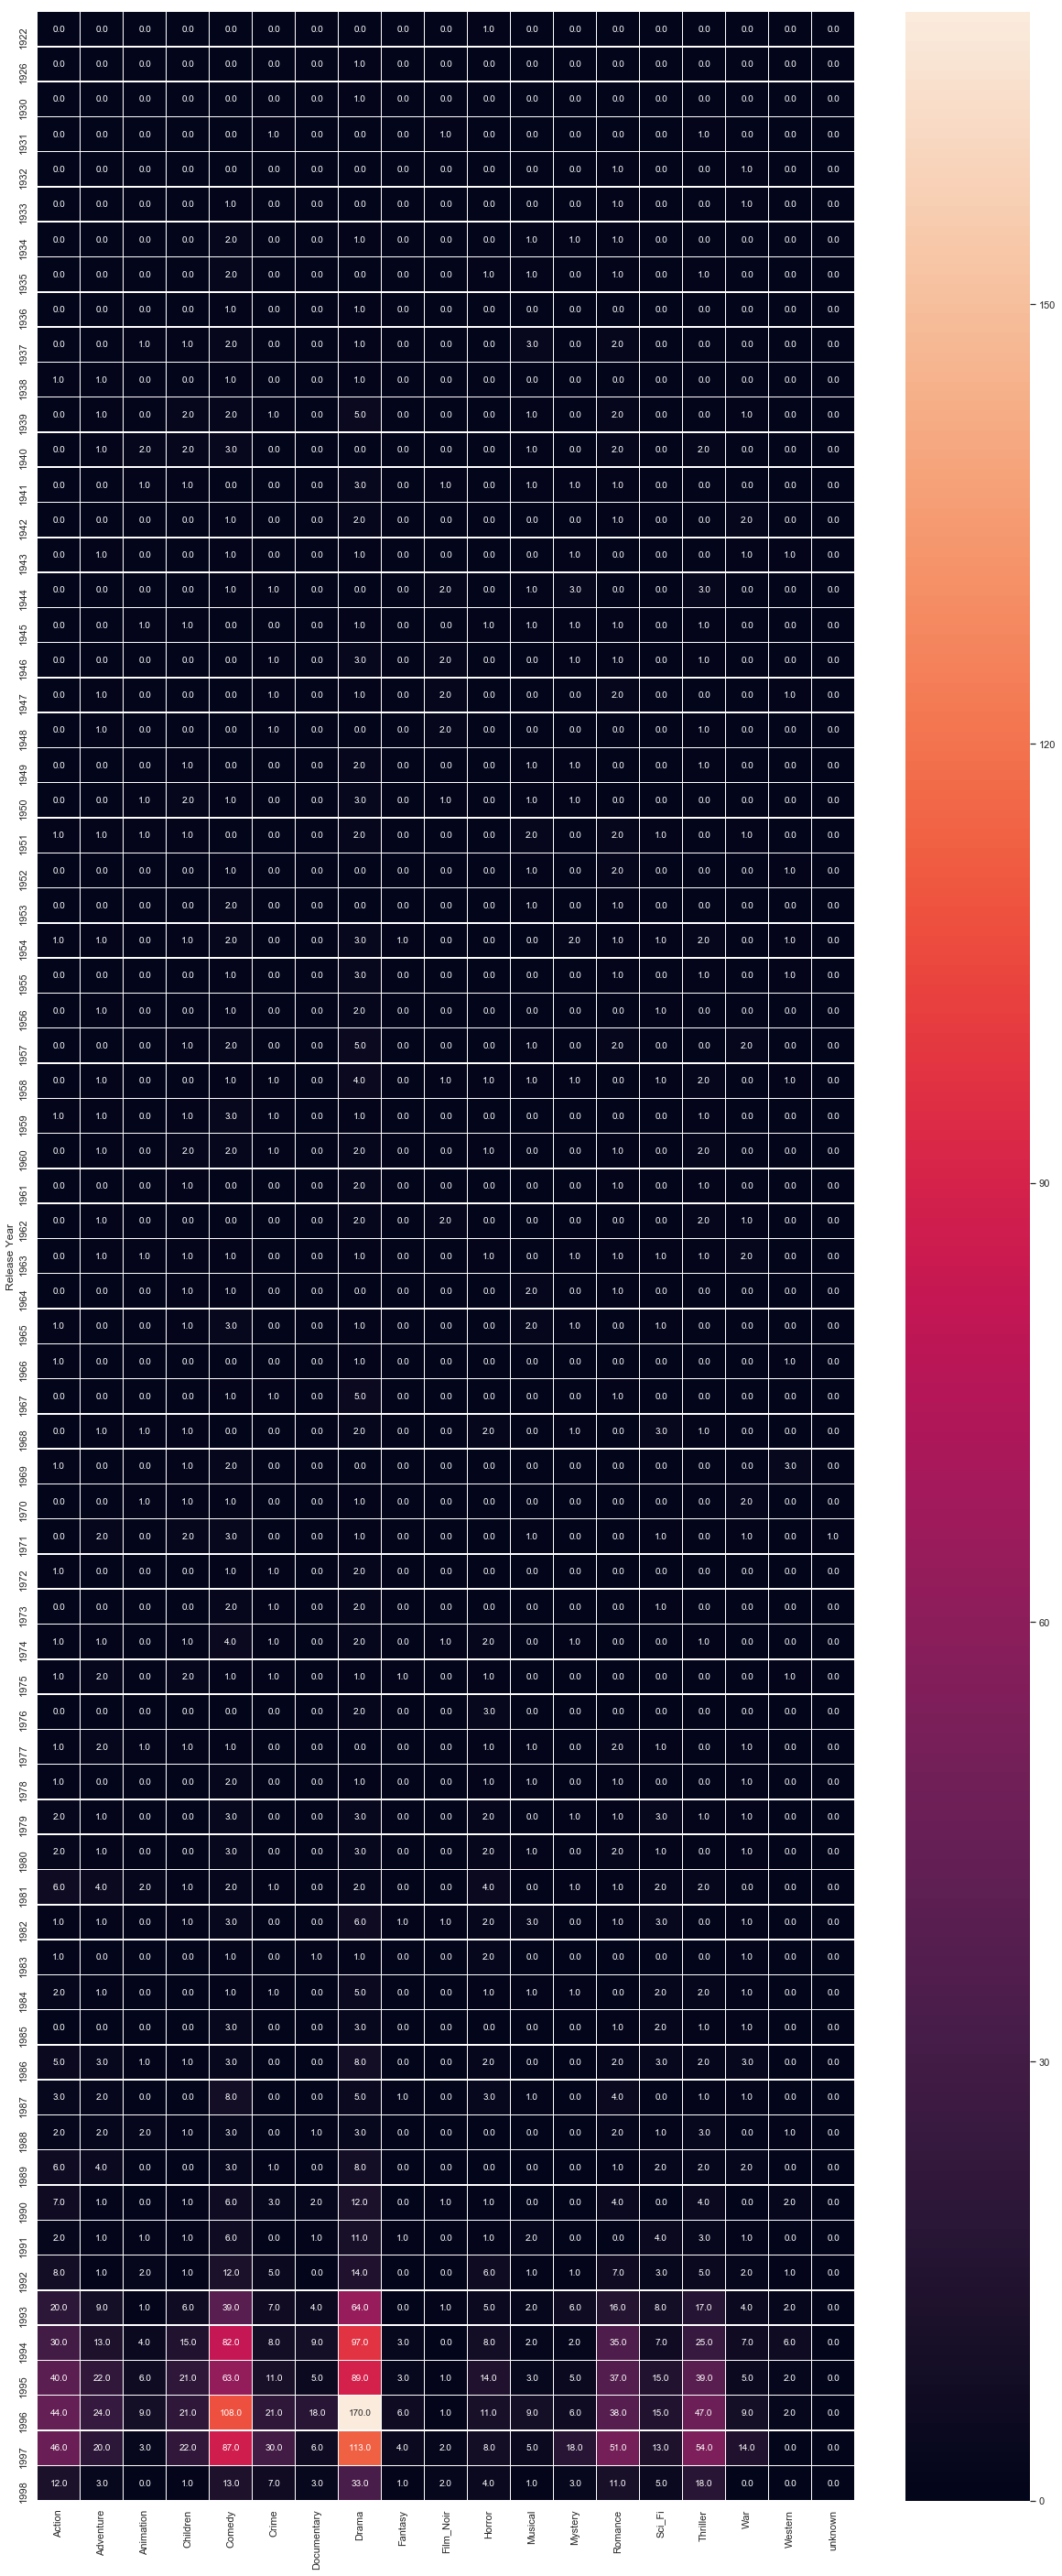

In [15]:
fig, ax = plt.subplots(figsize=(20,50))
sns.heatmap(pivot_table_1, annot=True, linewidths=.5, fmt= '.1f', ax=ax)

# TASK 4

- Display the top 25 movies by average rating, as a list/series/data frame. Note: Consider only the movies which received at least a 100 ratings (10 marks)

In [16]:
ratings.head()

,UserID,ItemID,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [17]:
sorted_ratings = ratings.sort_values(by=['ItemID'])

In [18]:
sorted_ratings.head()

,UserID,ItemID,rating,timestamp
25741,84,1,2,883452108
93639,806,1,4,882385082
55726,768,1,5,883835025
49529,92,1,4,875810511
89079,419,1,4,879435590


In [19]:
# Only consider movies with more than 100 ratings
v = sorted_ratings[['ItemID']]
sorted_ratings_threshold = sorted_ratings[v.replace(v.stack().value_counts()).gt(100).all(1)]

In [20]:
sorted_ratings_threshold.head()

,UserID,ItemID,rating,timestamp
25741,84,1,2,883452108
93639,806,1,4,882385082
55726,768,1,5,883835025
49529,92,1,4,875810511
89079,419,1,4,879435590


In [21]:
pivot_table_2 = sorted_ratings_threshold.pivot_table(values=['rating'], index='ItemID', aggfunc=np.average)

In [22]:
pivot_table_2.head()

,rating
ItemID,
1,3.878319
2,3.206107
4,3.550239
7,3.798469
8,3.995434


In [23]:
sorted_ratings_average = pivot_table_2.sort_values(by=['rating'], ascending=False)

In [24]:
sorted_ratings_average.head()

,rating
ItemID,
408,4.491071
318,4.466443
169,4.466102
483,4.456790
64,4.445230


In [25]:
sorted_ratings_average.reset_index(level=0, inplace=True)

In [26]:
sorted_ratings_average.head()

,ItemID,rating
0,408,4.491071
1,318,4.466443
2,169,4.466102
3,483,4.456790
4,64,4.445230


In [27]:
top_25 = sorted_ratings_average[:25]

In [28]:
top_25

,ItemID,rating
0,408,4.491071
1,318,4.466443
2,169,4.466102
3,483,4.456790
4,64,4.445230
5,603,4.387560
6,12,4.385768
7,50,4.358491
8,178,4.344000
9,134,4.292929


In [29]:
temp_df = movies[['movie_id','movie_title']]

In [30]:
temp_df.head()

,movie_id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [31]:
top_25_movies_name = temp_df.loc[temp_df['movie_id'].isin(top_25['ItemID'].tolist())]

In [32]:
top_25_movies_name

,movie_id,movie_title
11,12,"Usual Suspects, The (1995)"
49,50,Star Wars (1977)
63,64,"Shawshank Redemption, The (1994)"
97,98,"Silence of the Lambs, The (1991)"
126,127,"Godfather, The (1972)"
133,134,Citizen Kane (1941)
168,169,"Wrong Trousers, The (1993)"
171,172,"Empire Strikes Back, The (1980)"
173,174,Raiders of the Lost Ark (1981)
177,178,12 Angry Men (1957)


In [33]:
# Convert column name from movie_id to ItemID
top_25_movies_name.rename(columns={'movie_id':'ItemID'}, inplace=True)

/Users/silver-moon/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [34]:
top_25_movies_name

,ItemID,movie_title
11,12,"Usual Suspects, The (1995)"
49,50,Star Wars (1977)
63,64,"Shawshank Redemption, The (1994)"
97,98,"Silence of the Lambs, The (1991)"
126,127,"Godfather, The (1972)"
133,134,Citizen Kane (1941)
168,169,"Wrong Trousers, The (1993)"
171,172,"Empire Strikes Back, The (1980)"
173,174,Raiders of the Lost Ark (1981)
177,178,12 Angry Men (1957)


In [35]:
Final_output = pd.merge(top_25_movies_name, top_25, on ='ItemID').sort_values(by=['rating'], ascending=False)

# FINAL OUTPUT WITH TOP 25 MOVIES

In [36]:
Final_output

,ItemID,movie_title,rating
15,408,"Close Shave, A (1995)",4.491071
13,318,Schindler's List (1993),4.466443
6,169,"Wrong Trousers, The (1993)",4.466102
20,483,Casablanca (1942),4.456790
2,64,"Shawshank Redemption, The (1994)",4.445230
23,603,Rear Window (1954),4.387560
0,12,"Usual Suspects, The (1995)",4.385768
1,50,Star Wars (1977),4.358491
9,178,12 Angry Men (1957),4.344000
5,134,Citizen Kane (1941),4.292929


# TASK 5

- Comment on the validity of the following statements (no need for doing a statistical test. Compare percentages) - (15 marks)

    - Men watch more drama than women
    - Men watch more Romance than women
    - Women watch more Sci-Fi than men

In [37]:
users.head()

,UserID,Age,Gender,Occupation,ZipCode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [38]:
movies.head()

,movie_id,movie_title,Release Day,Release Month,Release Year,release_date,video_release_date,IMDb_URL,unknown,Action,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,1,Toy Story (1995),01,Jan,1995,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01,Jan,1995,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01,Jan,1995,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01,Jan,1995,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01,Jan,1995,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,...,0,0,0,0,0,0,0,1,0,0


In [39]:
ratings.head()

,UserID,ItemID,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [40]:
users.shape

(943, 5)

In [41]:
movies.shape

(1682, 27)

In [42]:
ratings.shape

(100000, 4)

In [43]:
First_merge = pd.merge(ratings, users, on='UserID')

In [44]:
First_merge.head()

,UserID,ItemID,rating,timestamp,Age,Gender,Occupation,ZipCode
0,196,242,3,881250949,49,M,writer,55105
1,196,393,4,881251863,49,M,writer,55105
2,196,381,4,881251728,49,M,writer,55105
3,196,251,3,881251274,49,M,writer,55105
4,196,655,5,881251793,49,M,writer,55105


In [45]:
movies_temp_df = movies

In [46]:
movies_temp_df.head()

,movie_id,movie_title,Release Day,Release Month,Release Year,release_date,video_release_date,IMDb_URL,unknown,Action,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,1,Toy Story (1995),01,Jan,1995,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01,Jan,1995,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01,Jan,1995,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01,Jan,1995,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01,Jan,1995,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,...,0,0,0,0,0,0,0,1,0,0


In [47]:
movies_temp_df.rename(columns={'movie_id':'ItemID'}, inplace=True)

In [48]:
movies_temp_df.head()

,ItemID,movie_title,Release Day,Release Month,Release Year,release_date,video_release_date,IMDb_URL,unknown,Action,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,1,Toy Story (1995),01,Jan,1995,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01,Jan,1995,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01,Jan,1995,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01,Jan,1995,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01,Jan,1995,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,...,0,0,0,0,0,0,0,1,0,0


In [49]:
Second_merge = pd.merge(First_merge, movies_temp_df, on='ItemID')

In [50]:
Second_merge.head()

,UserID,ItemID,rating,timestamp,Age,Gender,Occupation,ZipCode,movie_title,Release Day,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),24,...,0,0,0,0,0,0,0,0,0,0
1,305,242,5,886307828,23,M,programmer,94086,Kolya (1996),24,...,0,0,0,0,0,0,0,0,0,0
2,6,242,4,883268170,42,M,executive,98101,Kolya (1996),24,...,0,0,0,0,0,0,0,0,0,0
3,234,242,4,891033261,60,M,retired,94702,Kolya (1996),24,...,0,0,0,0,0,0,0,0,0,0
4,63,242,3,875747190,31,M,marketing,75240,Kolya (1996),24,...,0,0,0,0,0,0,0,0,0,0


In [51]:
pivot_table_3 = Second_merge.pivot_table(values= ['unknown','Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film_Noir','Horror','Musical','Mystery','Romance','Sci_Fi','Thriller','War','Western'], columns =['Gender'] ,aggfunc=np.sum)

In [52]:
pivot_table_3

Gender,F,M
Action,5442,20147
Adventure,3141,10612
Animation,995,2610
Children,2232,4950
Comedy,8068,21764
Crime,1794,6261
Documentary,187,571
Drama,11008,28887
Fantasy,363,989
Film_Noir,385,1348


In [53]:
pivot_table_3['Total'] = pivot_table_3['F'] + pivot_table_3['M']

In [54]:
pivot_table_3['Percentage_Male'] = 100*(pivot_table_3['M']/pivot_table_3['Total'])

In [55]:
pivot_table_3['Percentage_Female'] = 100*(pivot_table_3['F']/pivot_table_3['Total'])

In [56]:
pivot_table_3

Gender,F,M,Total,Percentage_Male,Percentage_Female
Action,5442,20147,25589,78.733049,21.266951
Adventure,3141,10612,13753,77.161347,22.838653
Animation,995,2610,3605,72.399445,27.600555
Children,2232,4950,7182,68.922306,31.077694
Comedy,8068,21764,29832,72.955216,27.044784
Crime,1794,6261,8055,77.728119,22.271881
Documentary,187,571,758,75.329815,24.670185
Drama,11008,28887,39895,72.407570,27.592430
Fantasy,363,989,1352,73.150888,26.849112
Film_Noir,385,1348,1733,77.784189,22.215811


# ANSWERS - TASK 5
- Men watch more drama than women - YES
- Men watch more Romance than women - YES
- Women watch more Sci-Fi than men - NO